In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud


### Data Preprocessing
Integrating datasets into two data frames, True and False

In [2]:
dfFake = pd.read_csv('Data/archive/Fake.csv')
dfFake['label'] = 'Fake'
del dfFake['subject']
del dfFake['date']

dfFake

,title,text,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,Fake
...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Fake
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Fake
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Fake
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Fake


In [3]:
dfTrue = pd.read_csv('Data/archive/True.csv')
dfTrue['label'] = 'True'
del dfTrue['subject']
del dfTrue['date']

dfTrue

,title,text,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,True
...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,True
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",True
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,True
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,True


#### Modified data quality report
Helps determine what further cleaning needs to be done

In [4]:
def quality_report(df):
  # Constructing a data quality report for the data
  cat_data = {'Feature': ['title', 'text', 'label'],
              'Count': df.count(),
              '% Missing': df.isnull().sum() * 100 / len(df),
              'Cardinality': df.apply(pd.Series.nunique),
              'Mode': [df.mode()['title'][0], 'null', df.mode()['label'][0]],
              'Mode Freq.': ['14', '769', '39644'],
              'Mode %': [14 / 63552 * 100, 769 / 64186 * 100 , 39644 / 64232 * 100],
      
              'Notes': ['', '', '']}
  cat_dqr_df = pd.DataFrame(cat_data)
  cat_dqr_df.reset_index(drop=True, inplace=True)

  return cat_dqr_df

In [5]:
print("Quality Report True Dataset")
quality_report(dfTrue).head()


Quality Report True Dataset


,Feature,Count,% Missing,Cardinality,Mode,Mode Freq.,Mode %,Notes
0,title,21417,0.0,20826,Factbox: Trump fills top jobs for his administ...,14,0.022029,
1,text,21417,0.0,21192,null,769,1.198081,
2,label,21417,0.0,1,True,39644,61.720015,


In [6]:
print("Quality Report Fake Dataset")
quality_report(dfFake).head()

Quality Report Fake Dataset


,Feature,Count,% Missing,Cardinality,Mode,Mode Freq.,Mode %,Notes
0,title,23481,0.0,17903,MEDIA IGNORES Time That Bill Clinton FIRED His...,14,0.022029,
1,text,23481,0.0,17455,null,769,1.198081,
2,label,23481,0.0,1,Fake,39644,61.720015,


In [7]:
# Build project using 10% 
dfTrue = dfTrue.head(int(0.1 * dfTrue.shape[0]))
dfFake = dfFake.head(int(0.1 * dfFake.shape[0]))

### Data Cleaning
Removing stopwords, punctuation, and whitespace characters and Stemming

In [8]:
def clean_string(input):
  ps = PorterStemmer()
  
  input = re.sub('[^a-zA-Z]', ' ', input)  # Remove special characters and spaces
  input = input.lower()
  input = input.split()

  input = [ps.stem(word) for word in input if not word in stopwords.words('english')] # Remove stopwords and replace word with stem
  input = ' '.join(input)
  
  return input

def preprocess(df):
  copy = df.copy()
  copy.drop_duplicates(inplace = True) # Remove duplicates
  copy.dropna(axis=0, inplace = True)  # Remove rows with missing values
  cleanfunc = np.vectorize(clean_string)    # Use vectorization to increase speed
  copy['title'] = cleanfunc(copy['title'])
  copy['text'] = cleanfunc(copy['text'])
  return copy

In [10]:
dfTrue = preprocess(dfTrue)
dfFake = preprocess(dfFake)

In [11]:
dfTrue

,title,text,label
0,u budget fight loom republican flip fiscal script,washington reuter head conserv republican fact...,True
1,u militari accept transgend recruit monday pen...,washington reuter transgend peopl allow first ...,True
2,senior u republican senat let mr mueller job,washington reuter special counsel investig lin...,True
3,fbi russia probe help australian diplomat tip nyt,washington reuter trump campaign advis georg p...,True
4,trump want postal servic charg much amazon shi...,seattl washington reuter presid donald trump c...,True
...,...,...,...
2136,trump virginia comment last straw disench ceo,new york washington reuter sever u chief execu...,True
2137,trump crisi spur talk white hous departur,new york washington reuter presid donald trump...,True
2138,trump advis bannon say u econom war china media,reuter unit state econom war china u presid do...,True
2139,trump blame side virginia violenc mani republi...,washington new york reuter u presid donald tru...,True


### Feature Extraction & Visualization

#### Character Count in Title and Text

In [12]:
def getCharCount(df, field):
  return [len(text) for text in df[field].to_list()]


def histogram_char_count(df, count, field, label):
  plt.hist(count)
  plt.xlabel("Characters")
  plt.ylabel("News")
  plt.title(f'Character Count Distribution of {field} in {label} News')
  plt.show()
  
def plot_avg_char_count(dfTrue, dfFake, field, countTrue, countFake):
  avg_count_true = int(np.average(countTrue))
  avg_count_fake = int(np.mean(countFake))

  df = pd.DataFrame([['True', int(avg_count_true)], ['Fake', int(avg_count_fake)]], columns=['News', 'Characters'])
  df.plot(x='News', y='Characters', kind='bar', width=0.3, xlabel='News', legend=False,
                    ylabel='Characters', title=f'Average Character Count of {field}')  
  plt.xticks(rotation=0)
  plt.show()
  

def character_stats(dfTrue, dfFake, field):
  print(f"Character Count Distribution of {field}")
  true_char_count= getCharCount(dfTrue, field)
  histogram_char_count(dfTrue, true_char_count, field, "True")

  fake_char_count = getCharCount(dfFake, field)
  histogram_char_count(dfFake, fake_char_count, field, "Fake") 

  print(f"Average Count of {field}")
  plot_avg_char_count(dfTrue, dfFake, field, true_char_count, fake_char_count)

Character Count Distribution of title


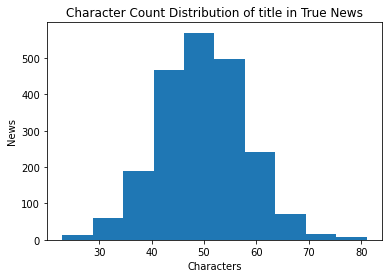

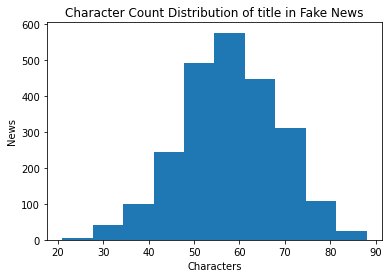

Average Count of title


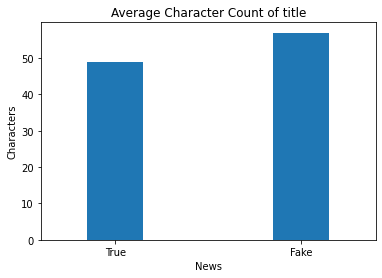

Character Count Distribution of text


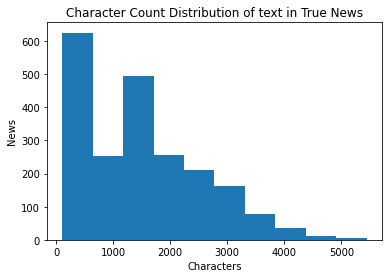

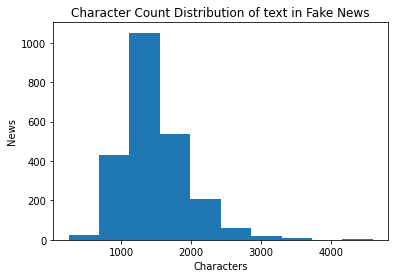

Average Count of text


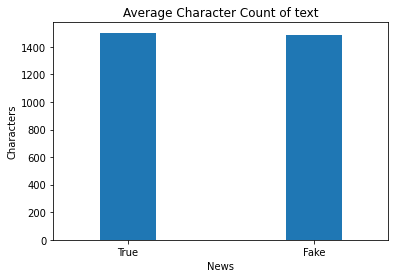

In [13]:
character_stats(dfTrue, dfFake, 'title')
character_stats(dfTrue, dfFake, 'text')

#### Word count in Title and Text

In [14]:
vectorizer = CountVectorizer()

def getWordCount(df, field):
  counts = []
  for text in df[field].to_list():
    text_count = np.sum(vectorizer.fit_transform([text]).toarray())
    counts.append(text_count)
  return counts

def histogram_word_count(df, count, field, label):
  plt.hist(count)
  plt.xlabel("Words")
  plt.ylabel("News")
  plt.title(f'Word Count Distribution of {field} in {label} News')
  plt.show()
  
def plot_avg_word_count(dfTrue, dfFake, field, countTrue, countFake):
  avg_count_true = int(np.average(countTrue))
  avg_count_fake = int(np.mean(countFake))

  df = pd.DataFrame([['True', int(avg_count_true)], ['Fake', int(avg_count_fake)]], columns=['News', 'Words'])
  df.plot(x='News', y='Words', kind='bar', width=0.3, xlabel='News', legend=False,
                    ylabel='Words', title=f'Average Word Count of {field}')  
  plt.xticks(rotation=0)
  plt.show()
  

def word_stats(dfTrue, dfFake, field):
  print(f"Word Count Distribution of {field}")
  true_word_count= getWordCount(dfTrue, field)
  histogram_word_count(dfTrue, true_word_count, field, "True")

  fake_word_count = getWordCount(dfFake, field)
  histogram_word_count(dfFake, fake_word_count, field, "Fake") 

  print(f"Average count of {field}")
  plot_avg_word_count(dfTrue, dfFake, field, true_word_count, fake_word_count)


Word Count Distribution of title


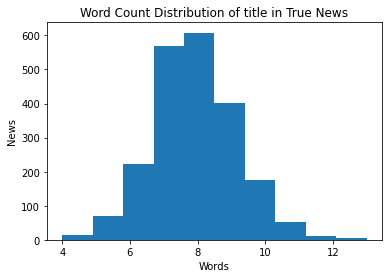

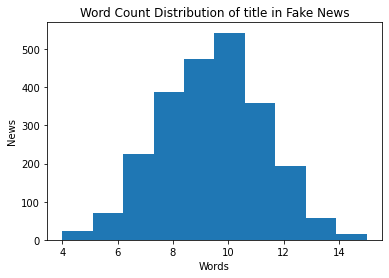

Average count of title


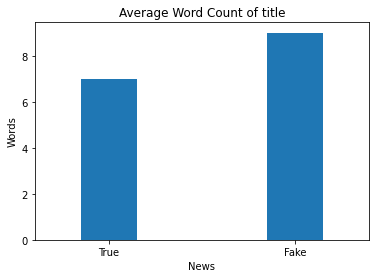

Word Count Distribution of text


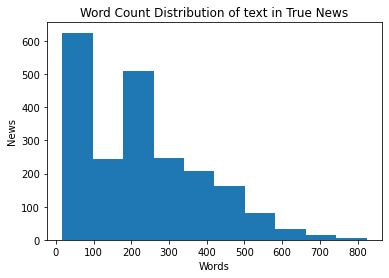

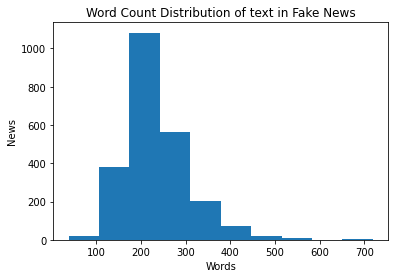

Average count of text


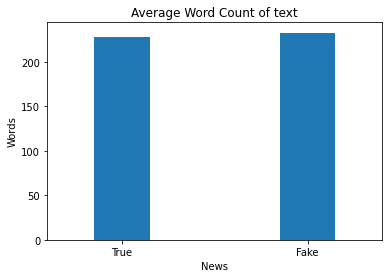

In [15]:
word_stats(dfTrue, dfFake, 'title')
word_stats(dfTrue, dfFake, 'text')

#### Visualize Frequent Words with WordCloud

In [16]:
def generateWordCloud(df, feature):
  wordcloud = WordCloud(max_words=30).generate(' '.join(df[feature].tolist()))
  
  # plot the WordCloud                      
  plt.figure(figsize = (10, 10), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)
  
  plt.show()


WordCloud for Fake News Titles


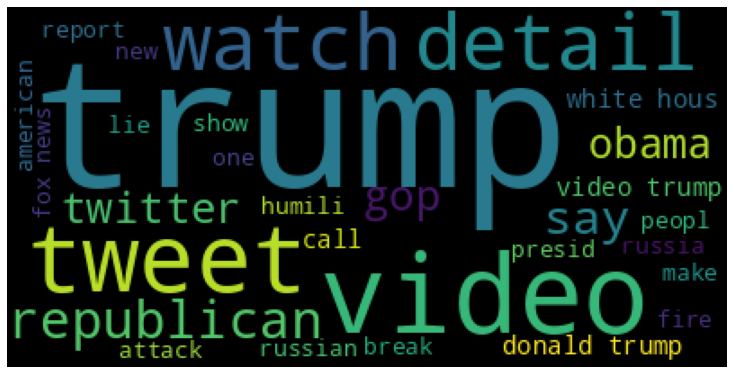

WordCloud for Fake News Text


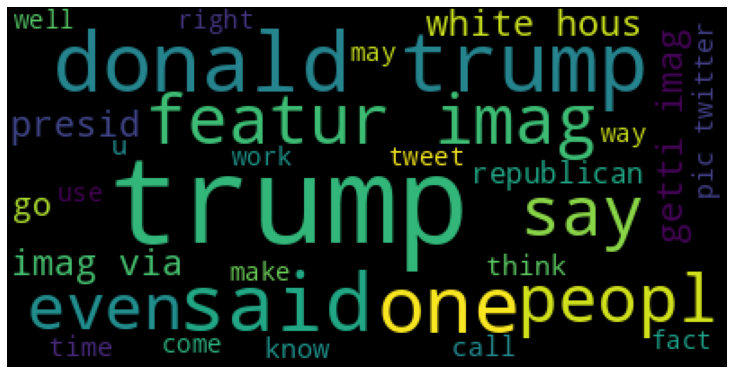

In [17]:
# Visualize most significant words for fake news
print("WordCloud for Fake News Titles")
generateWordCloud(dfFake, 'title')
print("WordCloud for Fake News Text")
generateWordCloud(dfFake, 'text')

WordCloud for True News Titles


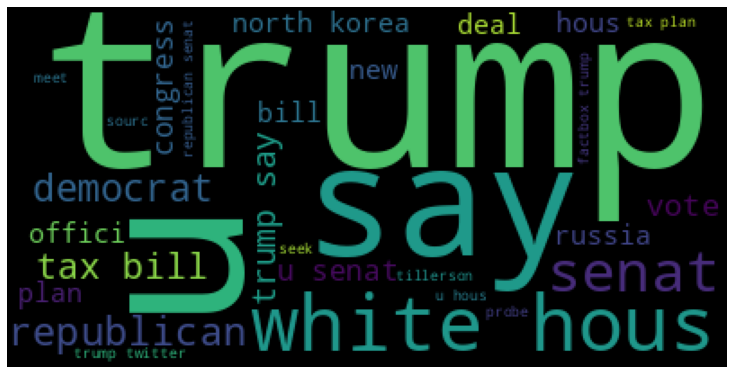

WordCloud for True News Text


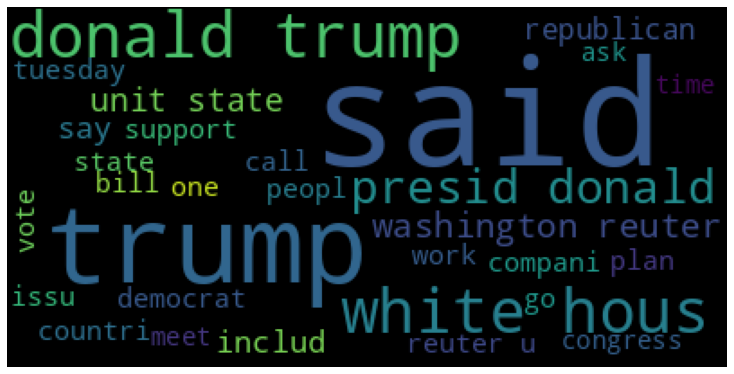

In [18]:
# Visualize most significant words for true news
print("WordCloud for True News Titles")
generateWordCloud(dfTrue, 'title')
print("WordCloud for True News Text")
generateWordCloud(dfTrue, 'text')

# Classifications

#### Combine Text and Title

In [19]:
def combine_text_title(df, label):
  newdf = pd.DataFrame()
  content = zip(df['title'].to_list(), df['text'].to_list())
  newdf['content'] = [str(title + text) for title, text in content]
  newdf['label'] = [ label for i in range(df.shape[0]) ]  # Add label
  # df.drop(columns = ['title', 'text'], inplace=True)
  return newdf

In [20]:
dfFake = combine_text_title(dfFake, 'Fake')
dfTrue = combine_text_title(dfTrue, 'True')

#### Create Train and Test Sets

In [32]:
dataset = pd.concat([dfTrue, dfFake]) # Combine True and Fake datasets 
train_set, test_set = train_test_split(dataset, train_size=0.7)
train_set

,content,label
2212,watch rabid trump support call liber genocid f...,Fake
76,bank healthcar servic firm among winner u tax ...,True
1934,reliabl rumor abound trump readi resignbecom i...,Fake
1910,trump said see ask whether u would attack nort...,True
920,trump say current fed chair yellen excelwashin...,True
...,...,...
1262,break look like russia hack vote machinsinc do...,Fake
151,republican senat lee undecid tax bill seek chi...,True
1365,trump bare liter note left israel holocaust me...,Fake
754,democrat win bitter virginia governor race set...,True


#### Create Different Term Vector Models

In [39]:
# Create specified vector model using vectorizer
def create_vector_model(vectorizer, train_set, test_set):
  train_labels = train_set['label']
  test_labels = test_set['label']

  train_set = vectorizer.fit_transform(train_set['content'])
  test_set = vectorizer.transform(test_set['content'])


  return train_set, train_labels, test_set, test_labels

In [41]:
# Create simple count vector model of dataset
count_v = CountVectorizer()
count_vector_model = create_vector_model(count_v, train_set, test_set)

In [40]:
# Create TF-IDF vector model of dataset
tfidf_v = TfidfVectorizer(max_features=5000, ngram_range=(1,3))  # Get 5000 most significant words
tfidf_vector_model = create_vector_model(tfidf_v, train_set, test_set)